## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

 Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
import seaborn as sns
%matplotlib inline


# Load Data from MongoDB

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
uri=os.getenv('url')
db=os.getenv('database')
collection=os.getenv('collection')


In [3]:
url=uri
client=MongoClient(url)
db=client[db]
collection=db[collection]

x=collection.find()
data=[]
for i in x:
   data.append(i)

In [4]:
df=pd.DataFrame(data)
df.drop('_id',axis=1,inplace=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
1,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
2,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
3,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
4,14,6,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [6]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Classes       1
Name: count, dtype: int64

In [7]:
df[110:129]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
110,10,6,2012,30,41,15,0,89.4,13.3,22.5,8.4,13.1,10,fire
111,22,6,2012,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2,not fire
112,26,6,2012,36,62,16,0,87.8,16.5,34.5,7,16.4,9.5,fire
113,30,6,2012,34,42,15,1.7,79.7,12,8.5,2.2,11.5,2.2,not fire
114,2,7,2012,33,48,16,0,87.6,7.9,17.8,6.8,7.8,6.4,fire
115,4,7,2012,34,58,18,0,88,13.6,36.8,8,14.1,9.9,fire
116,8,7,2012,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,fire
117,10,7,2012,34,51,16,3.8,77.5,8,9.5,2,7.7,1.3,not fire
118,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
119,25,7,2012,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,not fire


In [8]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


This data set has two region from 164th index 
1. Bejaia region as 0
2. Sidi-Bel Abbas Region as 1

In [10]:
df.loc[:164,'Region']=0
df.loc[164:,'Region']=1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4   RH           245 non-null    object 
 5   Ws           245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [12]:
df.Region.value_counts()

Region
0.0    164
1.0     83
Name: count, dtype: int64

In [13]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

# **Data Cleaning**

## Now time to Handaling Missing values

In [14]:
df=df.dropna()
df.reset_index(drop=True,inplace=True)

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
1,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0.0
2,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0.0
3,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0.0
4,14,6,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire,0.0


In [16]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [17]:
df.iloc[[164]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [20]:
df=df.drop(163).reset_index(drop=True)

# Change the require columns to as int type

In [21]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
1,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0.0
2,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0.0
3,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0.0
4,14,6,2012,30,78,20,0.5,59,4.6,7.8,1,4.4,0.4,not fire,0.0


In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.drop(['year', 'month', 'day'],axis=1,inplace=True)

In [24]:
df[['Temperature', 'RH', 'Ws','Region']]=df[['Temperature', 'RH', 'Ws','Region']].astype(int)

In [25]:
df_copy=df

In [26]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [27]:
df['Classes'].replace({'fire':1,'not fire':0},inplace=True)

/tmp/ipykernel_12664/1935248851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Classes'].replace({'fire':1,'not fire':0},inplace=True)
/tmp/ipykernel_12664/1935248851.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Classes'].replace({'fire':1,'not fire':0},inplace=True)


In [28]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [29]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    int64         
 1   RH           243 non-null    int64         
 2   Ws           243 non-null    int64         
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    int64         
 11  Region       243 non-null    int64         
 12  date         243 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(5)
memory usage: 24.8 KB


In [31]:
df.to_csv('Fire_Forest_Clean.csv')

# **Exploaratory Data Analysis**

In [32]:
df.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

## *Vizualization*

In [33]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05
1,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0,2012-06-07
2,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0,2012-06-08
3,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0,2012-06-10
4,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,0,0,2012-06-14


<Axes: >

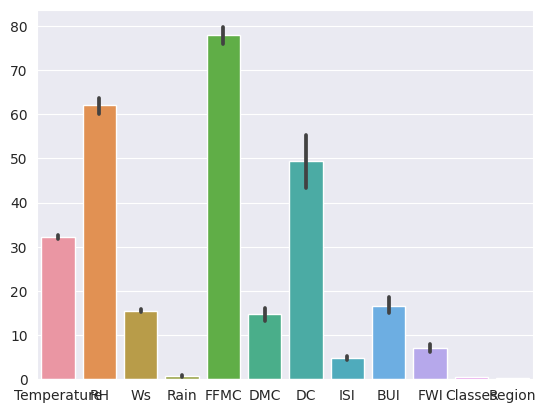

In [34]:
sns.set_style('darkgrid')
plt.Figure(figsize=(15,12))
sns.barplot(df)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


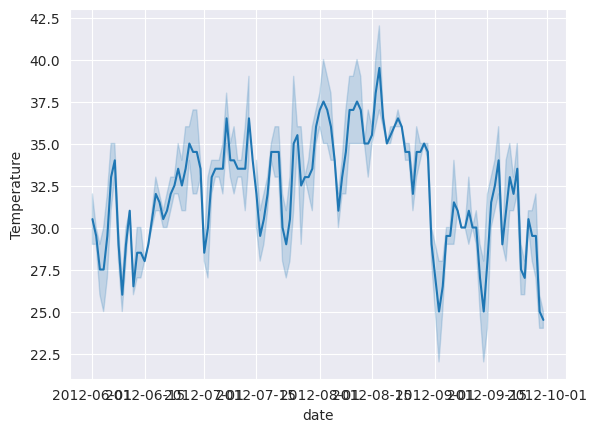

In [35]:
plt.Figure(figsize=(20,22))
sns.lineplot(y=df.Temperature,x=df.date)
plt.show()

### In August Temperature increases 40'c .

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


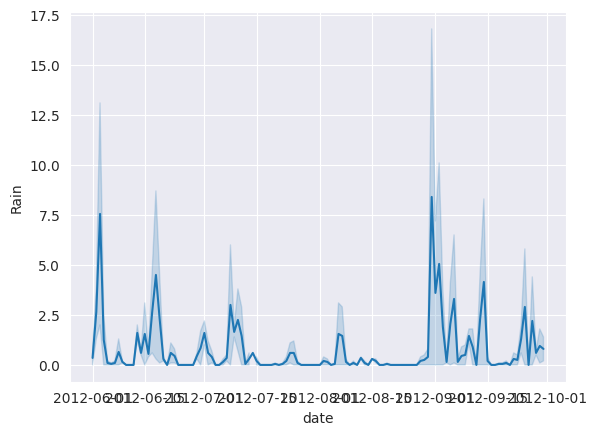

In [36]:
plt.Figure(figsize=(20,22))
sns.lineplot(y=df.Rain,x=df.date)
plt.show()

In [37]:
df=df.drop('date',axis=1)

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


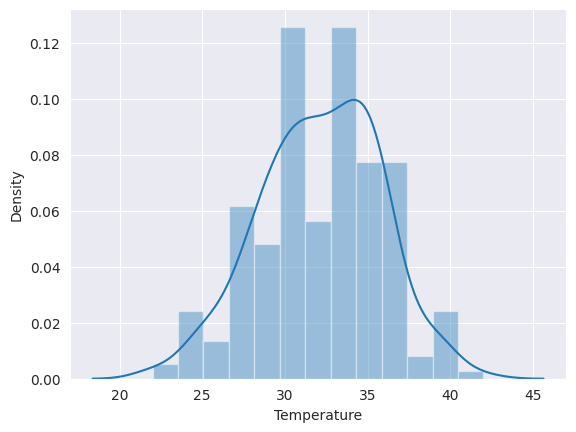

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


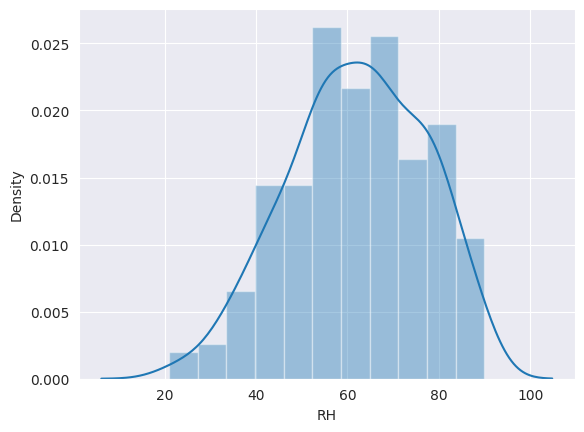

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


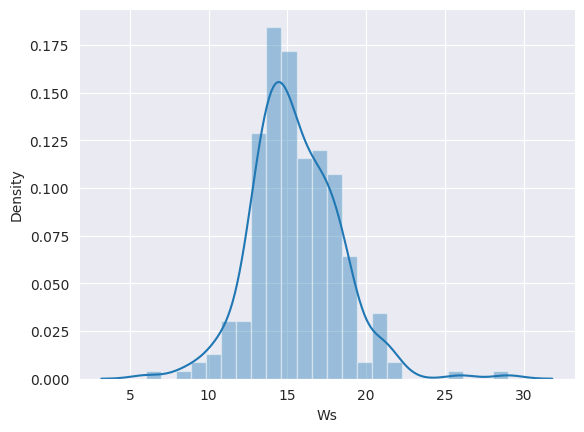

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


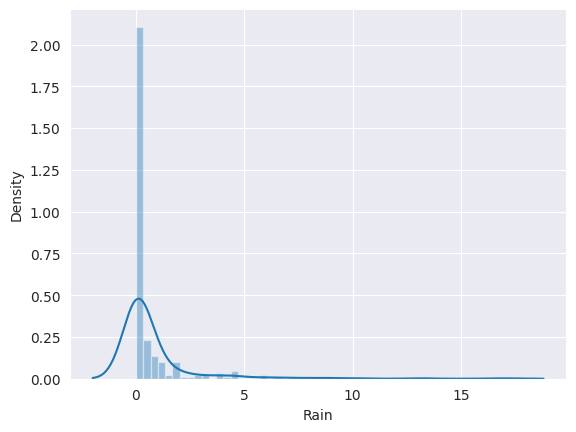

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


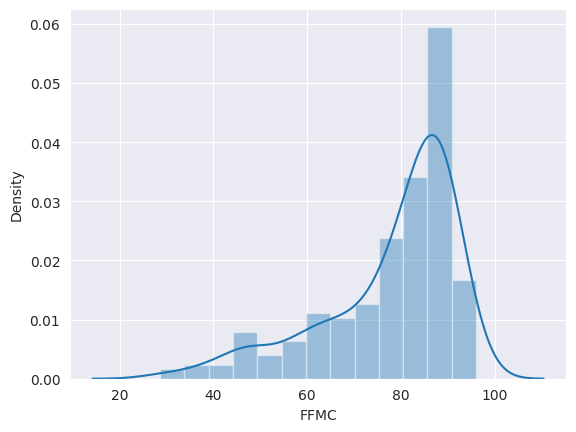

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


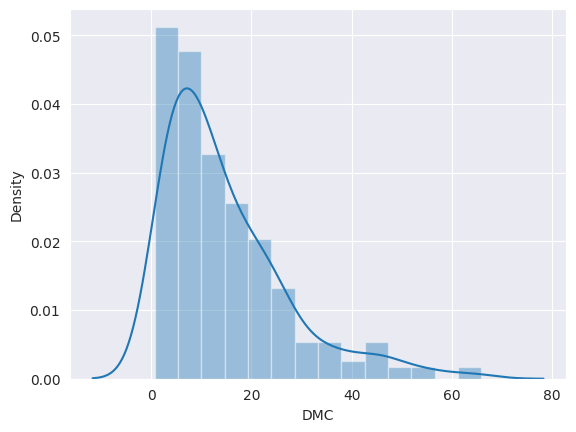

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


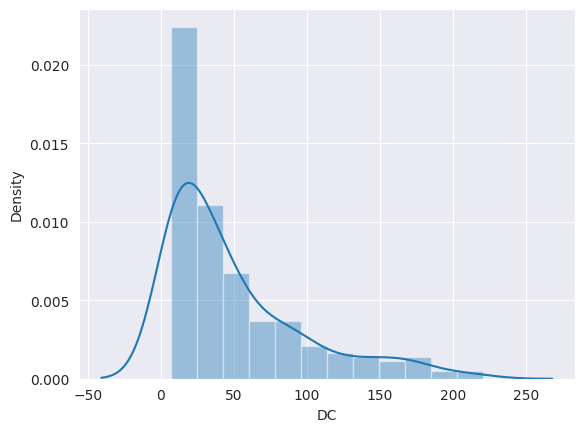

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


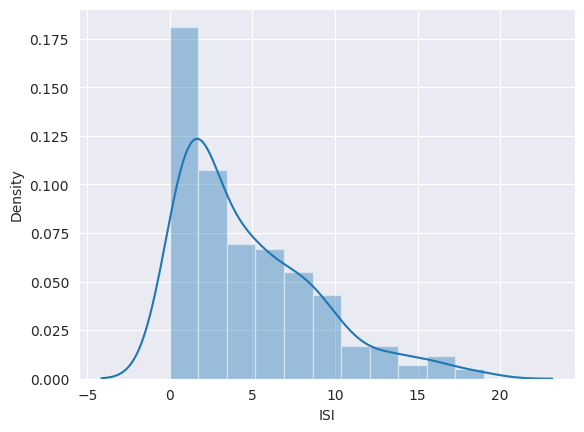

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


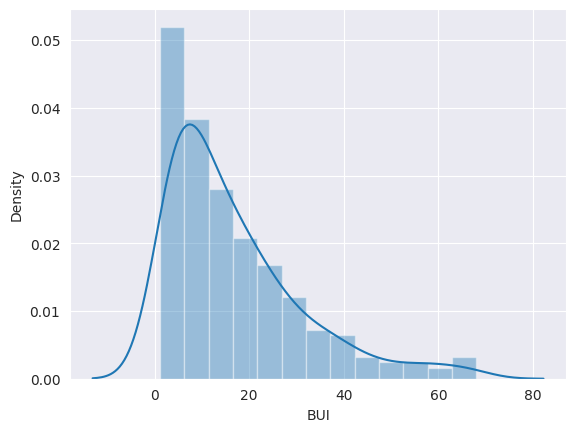

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


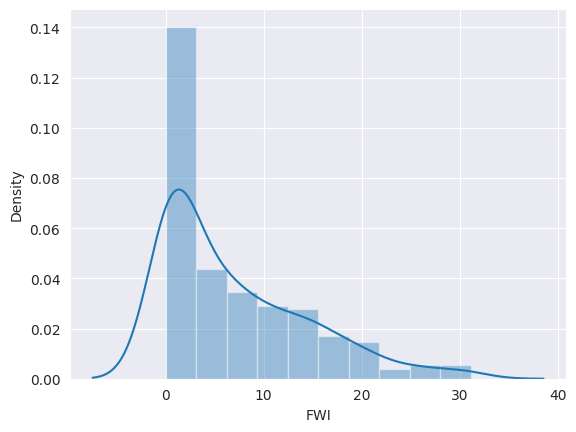

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


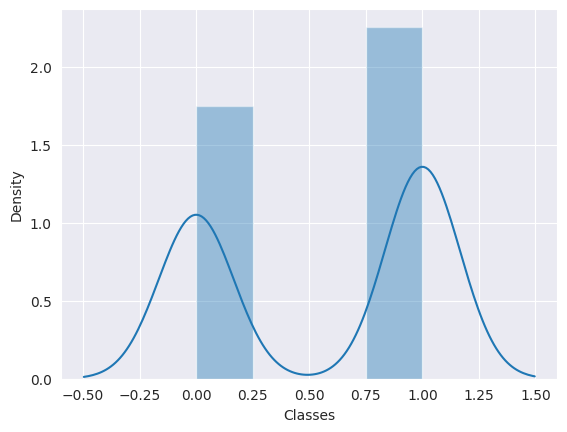

/tmp/ipykernel_12664/2807041917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


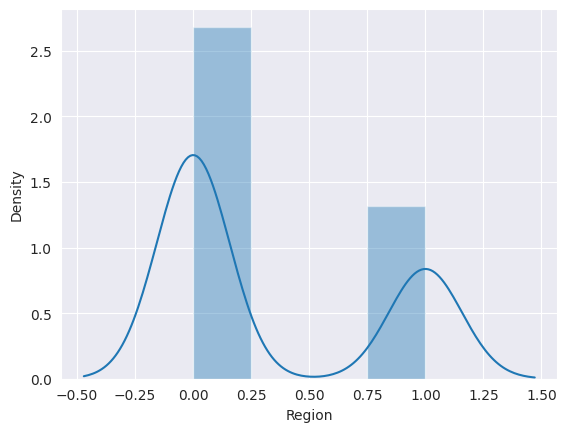

In [38]:
for i in df.columns[:50]:
    sns.distplot(df[i])
    plt.show()

In [39]:
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

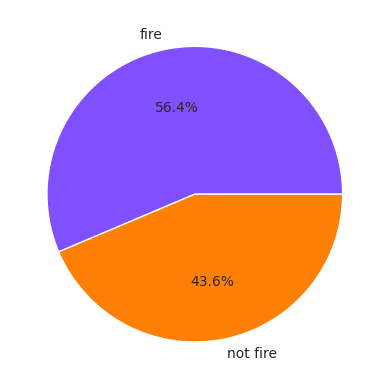

In [40]:
## pie chart
classes=['fire','not fire']
plt.pie(percentage,labels=classes,autopct='%1.1f%%',colors=['#8050FF','#FF8005'])
plt.show()

<Axes: >

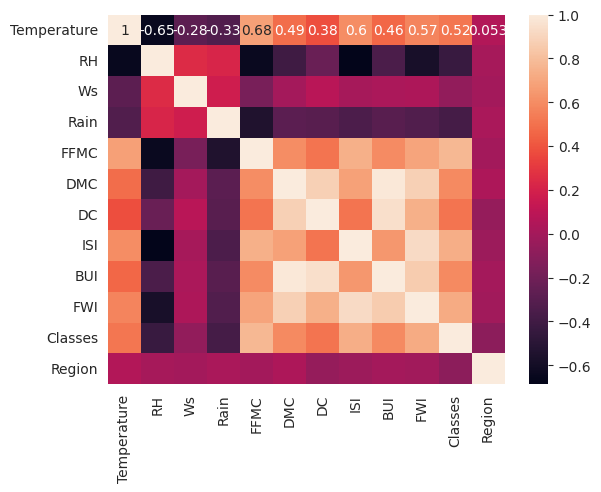

In [41]:
plt.Figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

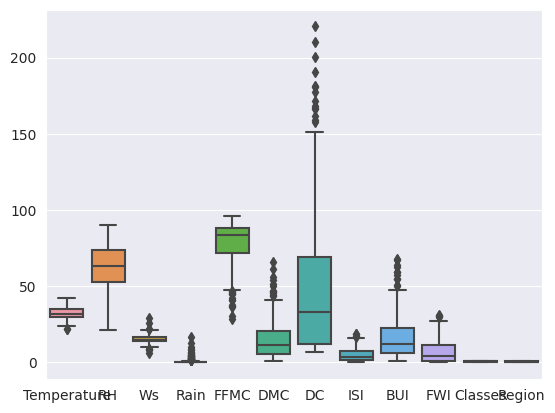

In [42]:
sns.boxplot(df)

In [43]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0,2012-06-05
1,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0,2012-06-07
2,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0,2012-06-08
3,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0,2012-06-10
4,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,0,0,2012-06-14


In [44]:
from ydata_profiling import ProfileReport

In [45]:
# Generate the profile report
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report as an HTML file
profile.to_file("data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]